In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.optimize import curve_fit

In [2]:
# load dataset
dataset = pd.read_csv('model_input2.csv', sep=';')
dataset

,sample,wt,J_norm,S_norm,Vp_anis,Vs1_anis,max_SWS,Vp_axial,Vp_trans,S_micas
0,PBT,0.730,7.14,1.11,20.2,18.7,19.9,16.7,4.9,1.52
1,ANL,0.726,4.08,0.80,23.4,19.7,20.1,22.0,1.9,1.10
2,IRO,0.705,6.36,1.17,24.1,22.8,23.3,22.9,2.2,1.66
3,WA,0.695,1.35,0.23,10.4,8.2,8.9,10.0,0.8,0.34
4,CA,0.679,9.58,1.38,28.7,27.2,27.8,28.2,1.1,2.04
5,RIM,0.644,5.65,0.81,15.0,5.5,12.0,6.4,10.7,1.25
6,OSO,0.631,8.94,1.32,26.5,24.1,24.9,25.9,0.4,2.09
7,EUP,0.599,9.66,1.28,23.5,23.7,24.4,22.9,1.0,2.14
8,GXE,0.588,17.01,1.61,22.9,25.0,26.2,22.1,0.9,2.74
9,RVS,0.485,6.32,1.00,18.2,13.6,14.9,15.7,4.6,2.06


> **Important note**
> Note that rows 14 to 19 contain artificially constructed data for the hypothetical case where the micas in the slates have no crystallographic preferred orientation, i.e. S_norm = 0. In this case, the intrinsic seismic anisotropy of the slate should be zero. This allows more points to be distributed in the defined 3D space and improves the model fit.

Text(0, 0.5, 'mica fraction')

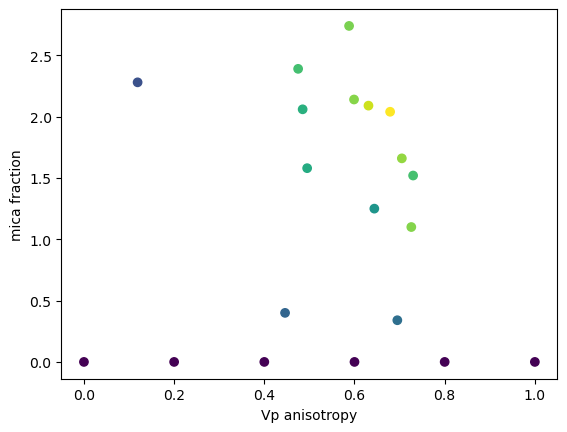

In [3]:
fig, ax = plt.subplots()

ax.scatter(dataset['wt'], dataset['S_micas'], c=dataset['Vp_anis'])
ax.set_xlabel('Vp anisotropy')
ax.set_ylabel('mica fraction')

In [8]:
# %matplotlib qt

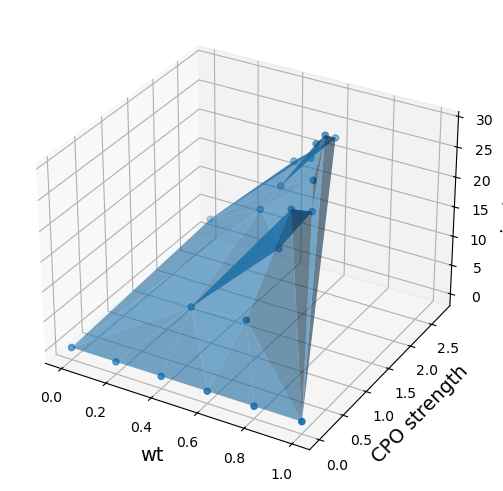

In [9]:
# make figure
fig1, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)
ax.scatter(dataset['wt'], dataset['S_micas'], dataset['Vp_anis'], antialiased=True)
ax.plot_trisurf(dataset['wt'], dataset['S_micas'], dataset['Vp_anis'], alpha=0.6, linewidth=0.2, antialiased=True)

_ = ax.set_xlabel(r'wt', fontsize=14), ax.set_ylabel(r'CPO strength', fontsize=14), ax.set_zlabel(r'anisotropy', fontsize=14)

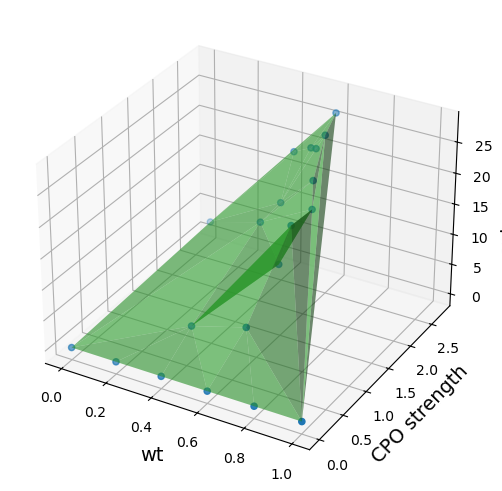

In [10]:
# make figure
fig2, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)
ax.scatter(dataset['wt'], dataset['S_micas'], dataset['max_SWS'], antialiased=True)
ax.plot_trisurf(dataset['wt'], dataset['S_micas'], dataset['max_SWS'], alpha=0.6, color='C2', linewidth=0.2, antialiased=True)

_ = ax.set_xlabel(r'wt', fontsize=14), ax.set_ylabel(r'CPO strength', fontsize=14), ax.set_zlabel(r'anisotropy', fontsize=14)

# Parametric approximation

In [11]:
def model1(tupla, a0, a1, a2, a3, a4):
    x, y = tupla
    return a0 + a1*x + a2*y + a3*x*y + a4*x**2

# least-squares fitting
popt, pcov = curve_fit(model1, xdata=(dataset['Vp_anis'], dataset['wt']), ydata=dataset['S_micas'])
popt2, pcov2 = curve_fit(model1, xdata=(dataset['Vs1_anis'], dataset['wt']), ydata=dataset['S_micas'])
popt3, pcov3 = curve_fit(model1, xdata=(dataset['max_SWS'], dataset['wt']), ydata=dataset['S_micas'])

popt

array([ 0.11674248,  0.22973282, -0.2243615 , -0.26760174,  0.00099105])

In [12]:
# make data
anisotropy = np.linspace(0, 30, 100)
wts = np.linspace(0, 1, 100)

Xs, Ys = np.meshgrid(anisotropy, wts)
Zs_vp = model1((Xs, Ys), popt[0], popt[1], popt[2], popt[3], popt[4])

Xs, Ys = np.meshgrid(anisotropy, wts)
Zs_vs1 = model1((Xs, Ys), popt2[0], popt2[1], popt2[2], popt2[3], popt2[4])

Xs, Ys = np.meshgrid(anisotropy, wts)
Zs_sws = model1((Xs, Ys), popt3[0], popt3[1], popt3[2], popt3[3], popt3[4])

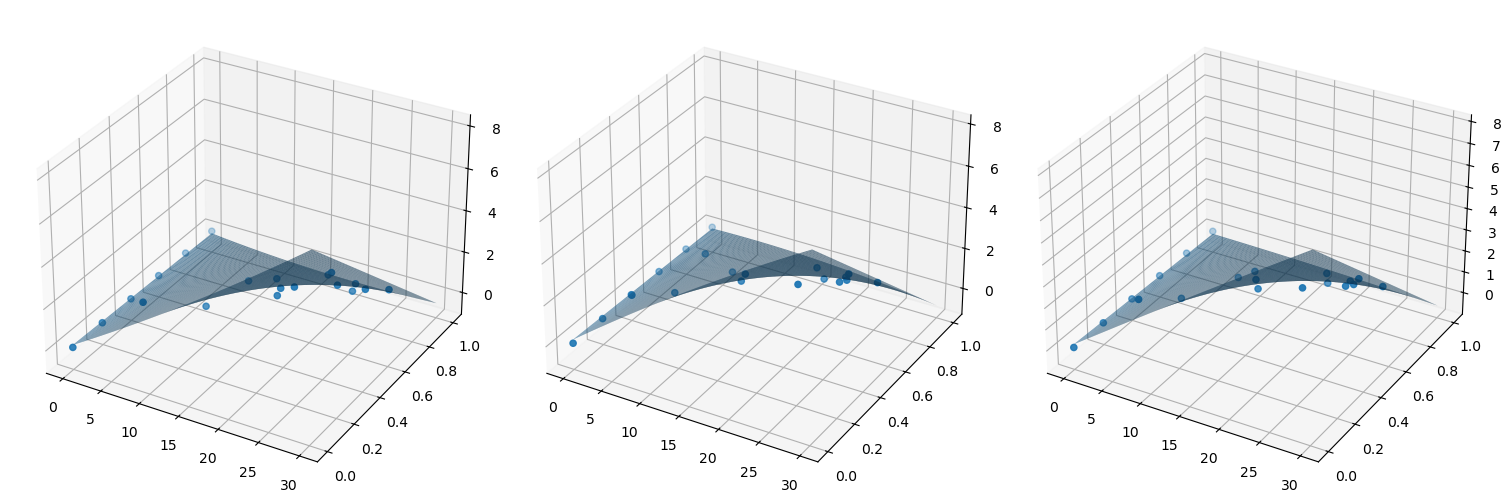

In [13]:
# make figure
fig3, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3, subplot_kw={"projection": "3d"}, constrained_layout=True)

ax1.scatter(dataset['Vp_anis'], dataset['wt'], dataset['S_micas'], antialiased=True)
ax1.plot_surface(Xs, Ys, Zs_vp, alpha=0.6, rstride=1, cstride=1)

ax2.scatter(dataset['Vs1_anis'], dataset['wt'], dataset['S_micas'], antialiased=True)
ax2.plot_surface(Xs, Ys, Zs_vs1, alpha=0.6, rstride=1, cstride=1)

ax3.scatter(dataset['max_SWS'], dataset['wt'], dataset['S_micas'], antialiased=True)
ax3.plot_surface(Xs, Ys, Zs_sws, alpha=0.6, rstride=1, cstride=1)

In [14]:
# Set Nature-like plots
import matplotlib as mpl

# Figure size
mpl.rcParams['figure.figsize'] = 6.2, 5.0
# Set x axis
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
# Set y axis
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
# Font sizes
mpl.rcParams['axes.labelsize'] = 19
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['font.size'] = 17
# Font Family
mpl.rcParams['font.family'] = 'Open Sans'
# Set line widths
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.markersize'] = 12
# Remove legend frame
mpl.rcParams['legend.frameon'] = False

In [16]:
# least-squares fitting
popt, pcov = curve_fit(model1, xdata=(dataset['wt'], dataset['S_micas']), ydata=dataset['Vp_anis'])
popt2, pcov2 = curve_fit(model1, xdata=(dataset['wt'], dataset['S_micas']), ydata=dataset['Vs1_anis'])
popt3, pcov3 = curve_fit(model1, xdata=(dataset['wt'], dataset['S_micas']), ydata=dataset['max_SWS'])

# make data
wt = np.linspace(0, 1, 100)
S = np.linspace(0, 2.8, 100)

Xs, Ys = np.meshgrid(wt, S)
Zs_vp = model1((Xs, Ys), popt[0], popt[1], popt[2], popt[3], popt[4])
Xs, Ys = np.meshgrid(wt, S)
Zs_vs1 = model1((Xs, Ys), popt2[0], popt2[1], popt2[2], popt2[3], popt2[4])
Xs, Ys = np.meshgrid(wt, S)
Zs_sws = model1((Xs, Ys), popt3[0], popt3[1], popt3[2], popt3[3], popt3[4])

Text(0.75, 0.08, '$R^2$ = 0.96')

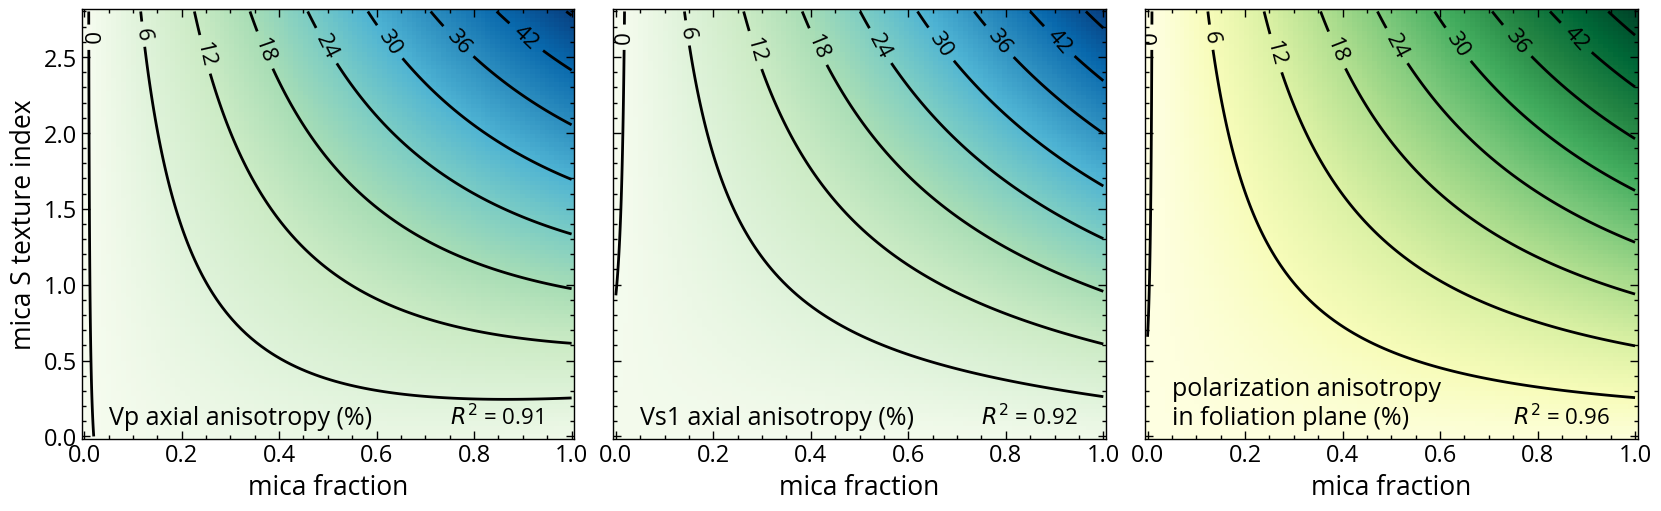

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(5*3*1.1, 5), ncols=3, sharey=True, constrained_layout=True)

ax1.pcolormesh(Xs, Ys, Zs_vp, cmap='GnBu')
cs1 = ax1.contour(Xs, Ys, Zs_vp, linestyles='solid', levels= 8, colors='black', linewidths=2.0)
ax1.clabel(cs1, cs1.levels, inline=True, fontsize=16)
ax1.set_xlabel('mica fraction')
ax1.set_ylabel('mica S texture index')
ax1.text(0.05, 0.08, 'Vp axial anisotropy (%)', fontsize=18)
ax1.text(0.75, 0.08, '$R^2$ = 0.91', fontsize=16)

ax2.pcolormesh(Xs, Ys, Zs_vs1, cmap='GnBu')
cs2 = ax2.contour(Xs, Ys, Zs_vs1, linestyles='solid', levels= 8, colors='black', linewidths=2.0)
ax2.clabel(cs2, cs2.levels, inline=True, fontsize=16)
ax2.set_xlabel('mica fraction')
ax2.text(0.05, 0.08, 'Vs1 axial anisotropy (%)', fontsize=18)
ax2.text(0.75, 0.08, '$R^2$ = 0.92', fontsize=16)

ax3.pcolormesh(Xs, Ys, Zs_sws, cmap='YlGn')
cs3 = ax3.contour(Xs, Ys, Zs_sws, linestyles='solid', levels= 8, colors='black', linewidths=2.0)
ax3.clabel(cs3, cs3.levels, inline=True, fontsize=16)
ax3.set_xlabel('mica fraction')
ax3.text(0.05, 0.08, 'polarization anisotropy\nin foliation plane (%)', fontsize=18)
ax3.text(0.75, 0.08, '$R^2$ = 0.96', fontsize=16)

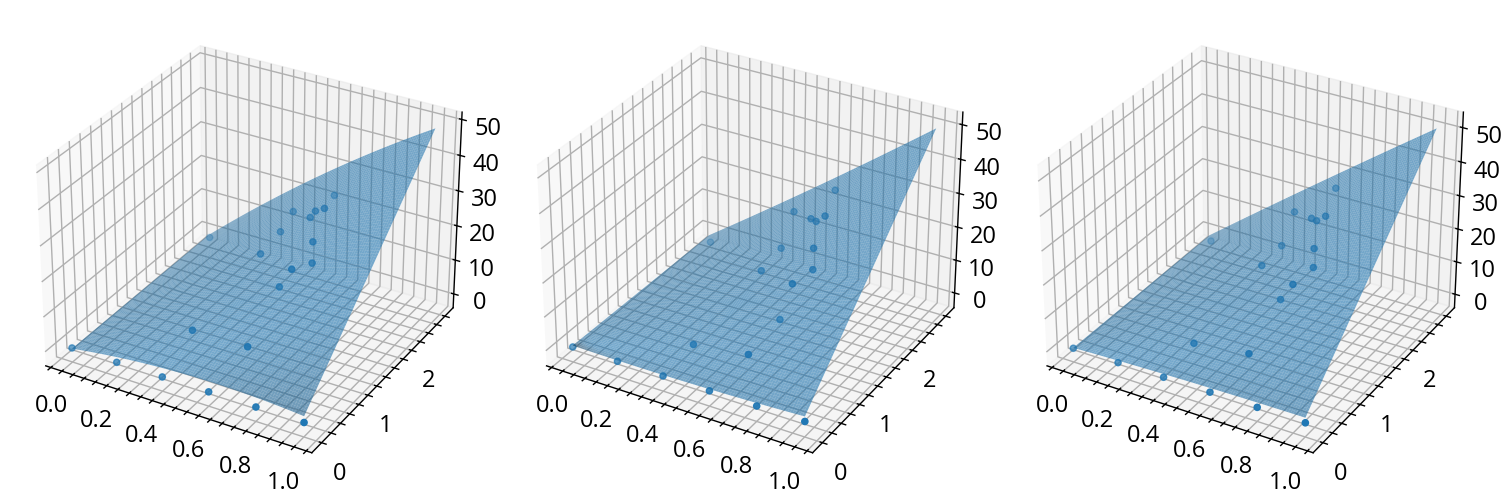

In [18]:
# make figure
fig3, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3, subplot_kw={"projection": "3d"}, constrained_layout=True)

ax1.scatter(dataset['wt'], dataset['S_micas'], dataset['Vp_anis'], antialiased=True)
ax1.plot_surface(Xs, Ys, Zs_vp, alpha=0.6, rstride=1, cstride=1)

ax2.scatter(dataset['wt'], dataset['S_micas'], dataset['Vs1_anis'], antialiased=True)
ax2.plot_surface(Xs, Ys, Zs_vs1, alpha=0.6, rstride=1, cstride=1)

ax3.scatter(dataset['wt'], dataset['S_micas'], dataset['max_SWS'], antialiased=True)
ax3.plot_surface(Xs, Ys, Zs_sws, alpha=0.6, rstride=1, cstride=1)

In [19]:
# 1. Calculate residuals: residuals = z_data - model
residuals_vp = dataset['Vp_anis'] - model1((dataset['wt'], dataset['S_micas']), *popt)
residuals_vs1 = dataset['Vs1_anis'] - model1((dataset['wt'], dataset['S_micas']), *popt2)
residuals_sws = dataset['max_SWS'] - model1((dataset['wt'], dataset['S_micas']), *popt3)

# 2. Calculate the total sum of squares
vp_tot = np.sum((dataset['Vp_anis'] - dataset['Vp_anis'].mean())**2)
vs1_tot = np.sum((dataset['Vs1_anis'] - dataset['Vs1_anis'].mean())**2)
sws_tot = np.sum((dataset['max_SWS'] - dataset['max_SWS'].mean())**2)

# 3. Calculate the residual sum of squares
vp_res = np.sum(residuals_vp**2)
vs1_res = np.sum(residuals_vs1**2)
sws_res = np.sum(residuals_sws**2)

# 4. Calculate the coefficient of determination (R²)
r_squared_vp = 1 - (vp_res / vp_tot)
r_squared_vs1 = 1 - (vs1_res / vs1_tot)
r_squared_sws = 1 - (sws_res / sws_tot)

print(f' Vp coefficient of determination (R²): {r_squared_vp:.2f}')
print(f'Vs1 coefficient of determination (R²): {r_squared_vs1:.2f}')
print(f'SWS coefficient of determination (R²): {r_squared_sws:.2f}')

 Vp coefficient of determination (R²): 0.91
Vs1 coefficient of determination (R²): 0.92
SWS coefficient of determination (R²): 0.96
